In [1]:
"""from azureml import Workspace

ws = Workspace()
ds = ws.datasets['transactions_v2.csv']
df_transactions = ds.to_dataframe()"""

"from azureml import Workspace\n\nws = Workspace()\nds = ws.datasets['transactions_v2.csv']\ndf_transactions = ds.to_dataframe()"

In [2]:
import pandas as pd
import numpy as np
import datetime

df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()

,Store ID,Store Type,Trans ID,Date,Time,Member ID,Member Grade,Gender,Member Birthday,Prod Name (Chi),Dept,Cat,Subcat,Sold Qty,MOP,Amount
0,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:47,NaN,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
1,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:48,NaN,NaN,NaN,NaN,å¹¸éæç´å·¾,Publications,Misc,Misc (General),1,ç¾é,0.0
2,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:49,NaN,NaN,NaN,NaN,VIP å ±ç´-$0.5,Publications,Promotion Coupon,Promotion Coupon (General),1,ç¾é,-0.5
3,27,HSR - HIGH STREET RESIDENTIAL,8151518417,2018-04-01,06:07:29,NaN,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
4,27,HSR - HIGH STREET RESIDENTIAL,8151518417,2018-04-01,06:07:30,NaN,NaN,NaN,NaN,å¹¸éæç´å·¾,Publications,Misc,Misc (General),1,ç¾é,0.0


In [3]:
###################update date format###################
date_format = '%Y-%m-%d'

df_transactions['Date'] = pd.to_datetime(df_transactions['Date'],format=date_format)
 #check max txn date
max_date = df_transactions['Date'].max()
d = datetime.timedelta(1)
today = max_date + d

#df_transactions['Member ID'] = df_transactions['Member ID'].astype(str)
#df_transactions['Trans ID'] = df_transactions['Trans ID'].astype(str)
df_transactions['Subcat'] = df_transactions['Subcat'].str.strip()

###################data preview###################
print(df_transactions.head())

   Store ID                     Store Type    Trans ID       Date      Time  \
0        27  HSR - HIGH STREET RESIDENTIAL  8151518418 2018-04-01  06:06:47   
1        27  HSR - HIGH STREET RESIDENTIAL  8151518418 2018-04-01  06:06:48   
2        27  HSR - HIGH STREET RESIDENTIAL  8151518418 2018-04-01  06:06:49   
3        27  HSR - HIGH STREET RESIDENTIAL  8151518417 2018-04-01  06:07:29   
4        27  HSR - HIGH STREET RESIDENTIAL  8151518417 2018-04-01  06:07:30   

   Member ID Member Grade Gender Member Birthday Prod Name (Chi)  \
0        NaN          NaN    NaN             NaN          æ±æ¹æ¥å ±æ¯ä»½   
1        NaN          NaN    NaN             NaN           å¹¸éæç´å·¾   
2        NaN          NaN    NaN             NaN     VIP å ±ç´-$0.5   
3        NaN          NaN    NaN             NaN          æ±æ¹æ¥å ±æ¯ä»½   
4        NaN          NaN    NaN             NaN           å¹¸éæç´å·¾   

           Dept                             Cat                     

In [4]:
#print(df_transactions.describe())  #-ve field: Sold Qty, Amount
#print(df_transactions.info())
#print(df_transactions.shape)  #(2759843, 16)

### Data Cleaning

In [5]:
#drop duplicate (2622316, 16)
df_transactions.drop_duplicates(keep='first', inplace=True) 

In [6]:
#replace member id with trans id if null
df_transactions['Member ID'] = np.where(df_transactions['Member ID'].isnull(),df_transactions['Trans ID'],df_transactions['Member ID']) 

In [7]:
df_transactions['Member ID'] = df_transactions['Member ID'].astype('int64')
df_transactions.head()

,Store ID,Store Type,Trans ID,Date,Time,Member ID,Member Grade,Gender,Member Birthday,Prod Name (Chi),Dept,Cat,Subcat,Sold Qty,MOP,Amount
0,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:47,8151518418,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
1,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:48,8151518418,NaN,NaN,NaN,å¹¸éæç´å·¾,Publications,Misc,Misc (General),1,ç¾é,0.0
2,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:49,8151518418,NaN,NaN,NaN,VIP å ±ç´-$0.5,Publications,Promotion Coupon,Promotion Coupon (General),1,ç¾é,-0.5
3,27,HSR - HIGH STREET RESIDENTIAL,8151518417,2018-04-01,06:07:29,8151518417,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
4,27,HSR - HIGH STREET RESIDENTIAL,8151518417,2018-04-01,06:07:30,8151518417,NaN,NaN,NaN,å¹¸éæç´å·¾,Publications,Misc,Misc (General),1,ç¾é,0.0


In [8]:
#select +ve price only
df_pos = df_transactions[(df_transactions['Sold Qty'] > 0) & (df_transactions['Amount'] > 0)]
print(df_pos.shape) #(2077101, 16)
print(df_pos.isnull().sum())  #783 is null for Subcat

(2077101, 16)
Store ID                 0
Store Type               0
Trans ID                 0
Date                     0
Time                     0
Member ID                0
Member Grade       1765936
Gender             1777619
Member Birthday    1806638
Prod Name (Chi)          0
Dept                     0
Cat                      0
Subcat                 783
Sold Qty                 0
MOP                      0
Amount                   0
dtype: int64


In [9]:
#df_pos.loc[(df_pos['Prod Name (Chi)'] == 'Ã§ÂÂÃ©ÂÂÃ¥Â°ÂÃ¦Â¥Â­Ã©Â¦ÂÃ¥ÂÂ£Ã§ÂÂ 8Ã§Â²ÂÃ¨Â£Â')&(df_pos['Subcat'].isnull()), 'Subcat']= 'Gum'

df_pos.loc[(df_pos['Prod Name (Chi)'] == 'çéå°æ¥­é¦å£ç 8ç²è£')&(df_pos['Subcat'].isnull()), 'Subcat']= 'Gum'

C:\Users\Tse\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
df_pos.head()

,Store ID,Store Type,Trans ID,Date,Time,Member ID,Member Grade,Gender,Member Birthday,Prod Name (Chi),Dept,Cat,Subcat,Sold Qty,MOP,Amount
0,27,HSR - HIGH STREET RESIDENTIAL,8151518418,2018-04-01,06:06:47,8151518418,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
3,27,HSR - HIGH STREET RESIDENTIAL,8151518417,2018-04-01,06:07:29,8151518417,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0
6,27,HSR - HIGH STREET RESIDENTIAL,8151518416,2018-04-01,06:07:48,8151518416,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,Octopus,8.0
7,27,HSR - HIGH STREET RESIDENTIAL,8151518416,2018-04-01,06:07:55,8151518416,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,Octopus,8.0
10,27,HSR - HIGH STREET RESIDENTIAL,8151518415,2018-04-01,06:09:38,8151518415,NaN,NaN,NaN,æ±æ¹æ¥å ±æ¯ä»½,Publications,Newspaper,Newspaper (General),1,ç¾é,8.0


In [11]:
df_pos.to_csv('df_transactions_clean.csv')

### Data Manipulation

In [12]:
#############################Unique column#############################
#Check unique value for each column
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)
unique_counts(df_transactions)

unique_counts(df_pos)

Store ID :  30
Store Type :  7
Trans ID :  1540100
Date :  31
Time :  85744
Member ID :  1436109
Member Grade :  3
Gender :  2
Member Birthday :  616
Prod Name (Chi) :  4716
Dept :  20
Cat :  123
Subcat :  314
Sold Qty :  95
MOP :  8
Amount :  5818
Store ID :  30
Store Type :  7
Trans ID :  1529210
Date :  31
Time :  85617
Member ID :  1424995
Member Grade :  3
Gender :  2
Member Birthday :  616
Prod Name (Chi) :  3440
Dept :  19
Cat :  113
Subcat :  295
Sold Qty :  71
MOP :  8
Amount :  5337


In [13]:
#############################RFM#############################
#Create RFM table
def rfm(df, cust_id, invoice_no, invoice_date, unit_price):
    
    rfmTable = df.groupby(cust_id).agg({invoice_date: lambda x: (today - x.max()).days, \
                                        invoice_no: 'nunique', \
                                        'Amount': lambda x: x.sum()})
    rfmTable[invoice_date] = rfmTable[invoice_date].astype(int)   
    rfmTable.rename(columns={invoice_date: 'recency', 
                             invoice_no: 'frequency', 
                             'Amount': 'monetary_value'}, inplace=True)
    return rfmTable

def rfm_seg():
     
    quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
    quantiles = quantiles.to_dict()

    #The lowest recency, highest frequency and monetary amounts are the best customers
    def RScore(x,p,d):
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]: 
            return 3
        else:
            return 4
    
    def FMScore(x,p,d):
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]: 
            return 2
        else:
            return 1

    segmented_rfm = df_rfm.copy()
    segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
    segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
    segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
    #Add a new column to combine RFM score: 111 is the highest score
    segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
    #return segmented_rfm[segmented_rfm['RFMScore'] == rfm_score].index.get_values()
    return segmented_rfm

#create rfm_seg index list
def rfm_seg_index(r, f, m):
    
    df = rfm_seg()
    
    df = df[(df['r_quartile'] == r)&(df['f_quartile'] == f)&(df['m_quartile'] == m)]
    
    return df.index.get_values().tolist()

#combine rfm_seg index list
def combine_rfm_seg_index(inc_list):
    
    i_list = []
    
    for i in range(0, len(inc_list)):
        i_list += inc_list[i]
        
    return i_list

In [14]:
#############################pre-processing#############################
def cust_lv(df, cust_id, stock_code, quantity, unit_price, invoice_no):

    df_cust_txn = df.groupby([cust_id]).agg({
                                                invoice_no: {'total_transactions':'nunique'}, \
                                                stock_code: {'total_products':'count','total_unique_products':'nunique'}, \
                                                'Amount': {'total_sales': 'sum','avg_product_value': 'mean'}, \
                                                quantity: {'total_quantity': 'sum'}})
    df_cust_txn.columns = df_cust_txn.columns.droplevel()
        
    return df_cust_txn


def cust_pdt(df, cust_id, stock_code, quantity, unit_price, invoice_no):
        
    df_cust_txn = df.groupby([cust_id,stock_code]).agg({
                                                invoice_no: {'total_transactions':'nunique'}, \
                                                quantity: {'total_quantity': 'sum'}})
    df_cust_txn.columns = df_cust_txn.columns.droplevel()
        
    return df_cust_txn.reset_index(stock_code)

In [15]:
###################################################
#update col name for RFM table
df_rfm = rfm(df_pos, 'Member ID', 'Trans ID', 'Date','Amount')
df_rfm.head()

,recency,frequency,monetary_value
Member ID,,,
92,11,2,73.9
93,4,3,49.1
185,2,56,1395.5
273,7,3,30.9
274,13,13,211.2


In [16]:
#create rfm_seg
df_rfm_seg = rfm_seg()
#rfm_list = [rfm_seg_index(2, 1, 1), rfm_seg_index(3, 1, 1), rfm_seg_index(4, 1, 1)]
rfm_list = [rfm_seg_index(2, 1, 1)]

rfm_col_list = combine_rfm_seg_index(rfm_list)

In [17]:
rfm_col_list = combine_rfm_seg_index(rfm_list)
for i in range(0,len(rfm_list)):
    print (len(rfm_list[i]))

1719


In [18]:
#create table in cust lv
df_cust_lv = cust_lv(df_pos, 'Member ID', 'Subcat', 'Sold Qty', 'Amount', 'Trans ID')
df_cust_lv.head()

C:\Users\Tse\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,total_quantity
Member ID,,,,,,
92,2,6,4,73.9,12.316667,6
93,3,6,2,49.1,8.183333,6
185,56,112,37,1395.5,12.459821,120
273,3,3,2,30.9,10.300000,3
274,13,18,8,211.2,11.733333,18


In [19]:
df_cust_by_pdt = cust_pdt(df_pos, 'Member ID', 'Subcat', 'Sold Qty', 'Amount', 'Trans ID')
df_cust_by_pdt.head()

C:\Users\Tse\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Subcat,total_transactions,total_quantity
Member ID,,,
92,236ML,1,1
92,ASAHI,1,1
92,INTERNATIONAL SOURCING JAPAN,1,2
92,SM<=500ML,1,2
93,Bottle,1,2


In [20]:
df_cust_basic = pd.concat([df_cust_lv[['total_products','total_quantity']], df_rfm],axis=1)
df_cust_basic.describe()

,total_products,total_quantity,recency,frequency,monetary_value
count,1.424995e+06,1.424995e+06,1.424995e+06,1.424995e+06,1.424995e+06
mean,1.457620e+00,1.526747e+00,1.591253e+01,1.086727e+00,8.975904e+01
std,1.969584e+00,2.628856e+00,8.617362e+00,9.713118e-01,2.232271e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e-01
25%,1.000000e+00,1.000000e+00,8.000000e+00,1.000000e+00,9.500000e+00
50%,1.000000e+00,1.000000e+00,1.600000e+01,1.000000e+00,2.750000e+01
75%,1.000000e+00,1.000000e+00,2.300000e+01,1.000000e+00,1.000000e+02
max,1.630000e+02,5.000000e+02,3.100000e+01,1.200000e+02,1.000000e+04


### Dimensionality Reduction

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [22]:
#############update value#####################
top_n = 20
random_state = 123
pca_var = 0.8

In [23]:
def d_reduction(df, cust_id, stock_code, top_n, seg):
    
    df_seg = df[df[cust_id].isin(seg)]
    df_item = pd.get_dummies(df_seg[[cust_id, stock_code]], columns = [stock_code])
    # Create item_data by aggregating at customer level
    df_item_by_cust = df_item.groupby(cust_id).sum()
    # Get list of StockCodes for the n most popular items
    top_n_items = df_item_by_cust.sum().sort_values().tail(top_n).index.tolist()
    df_item_by_cust = df_item_by_cust[top_n_items]
    
    return (df_item_by_cust, top_n_items)

df_cust_txn_seg, top_n_items = d_reduction(df_transactions, 'Member ID', 'Subcat', top_n, rfm_col_list)

### PCA

In [24]:
######################PCA###########################
pca_test = PCA(pca_var).fit(df_cust_txn_seg)
pca_n = pca_test.n_components_
print(pca_n)

11


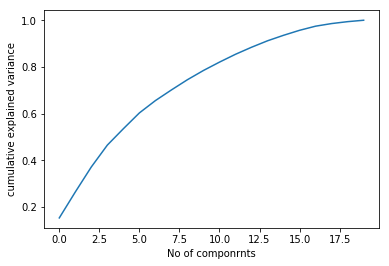

In [25]:
#pca plot
pca = PCA().fit(df_cust_txn_seg)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of componrnts')
plt.ylabel('cumulative explained variance')
plt.show()

[4.26351765 3.10676237 2.99867604 2.61641404 1.95975392 1.89274381
 1.47557633 1.2769514  1.22544356 1.10514543 0.99984549 0.93917346
 0.84169828 0.7740415  0.65790022 0.5975625  0.49462029 0.31257119
 0.22873006 0.16877476]


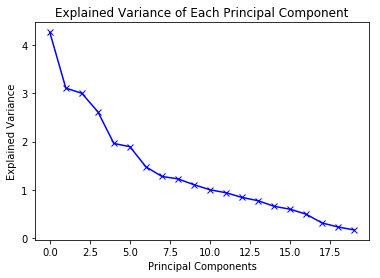

In [26]:
print(pca.explained_variance_ )
plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_,'bx-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Each Principal Component')
plt.show()

In [27]:
pca = PCA(n_components=pca_n)
pca.fit_transform(df_cust_txn_seg)
#print(np.around(pca.components_, decimals=4))
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 3.30857378e-02  7.53935075e-02  1.35167450e-02 -4.02168044e-02
   4.97536153e-02 -3.50645747e-02  4.56673336e-02  3.79070495e-02
  -4.80512505e-02  1.22210708e-01 -7.48476201e-02  4.30346402e-02
  -8.30674637e-02 -2.05987728e-02  1.84858184e-01  3.07129895e-01
   3.63762218e-01 -4.40343071e-02  4.50694908e-01  6.97338821e-01]
 [ 1.14480633e-01  7.28220282e-03  8.67735496e-02 -1.82816767e-02
   4.16714892e-02 -3.67515450e-02  4.08042255e-02 -6.58570634e-02
   5.08929348e-01  5.21498369e-03 -7.72684373e-02  3.16337272e-02
  -9.38859953e-02  3.80134096e-01  4.03691463e-02  2.24600429e-01
   9.62761843e-02  4.30170098e-01  3.99755092e-01 -3.79959860e-01]
 [-7.13535590e-02 -8.05658438e-03  7.31091269e-02  2.74403943e-02
  -3.16381549e-02  7.80743920e-03 -2.47660167e-02  4.48272083e-02
   6.14036800e-01 -2.11568189e-02  1.67280281e-02 -1.69648990e-02
   3.58614035e-02  4.23934837e-01 -7.00572742e-02 -1.47490679e-01
  -7.40229033e-02 -5.09930913e-01 -2.11453484e-01  2.98521072e-01]
 [-4.95

In [28]:
df_pca = pd.DataFrame(pca.components_,columns=df_cust_txn_seg.columns,index = ['PCA_' + str(i) for i in range(pca_n)])
print(df_pca)
#print(df_pca.describe())

        Subcat_Coupon (General)  Subcat_Bite Size  Subcat_HOT TITLES  \
PCA_0                  0.033086          0.075394           0.013517   
PCA_1                  0.114481          0.007282           0.086774   
PCA_2                 -0.071354         -0.008057           0.073109   
PCA_3                 -0.004958         -0.035206          -0.010124   
PCA_4                  0.122448         -0.035118          -0.009019   
PCA_5                  0.039981         -0.025058          -0.041208   
PCA_6                  0.044258          0.040090          -0.076662   
PCA_7                  0.004957          0.004356          -0.053842   
PCA_8                 -0.000587         -0.090696          -0.019362   
PCA_9                  0.006626          0.023680          -0.028767   
PCA_10                 0.007200          0.011030          -0.001178   

        Subcat_Non-Menthol Lights KS  Subcat_Cakes  \
PCA_0                      -0.040217      0.049754   
PCA_1                      

### K-mean

In [29]:
#check for 0 value
df_cust_basic.describe()

,total_products,total_quantity,recency,frequency,monetary_value
count,1.424995e+06,1.424995e+06,1.424995e+06,1.424995e+06,1.424995e+06
mean,1.457620e+00,1.526747e+00,1.591253e+01,1.086727e+00,8.975904e+01
std,1.969584e+00,2.628856e+00,8.617362e+00,9.713118e-01,2.232271e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e-01
25%,1.000000e+00,1.000000e+00,8.000000e+00,1.000000e+00,9.500000e+00
50%,1.000000e+00,1.000000e+00,1.600000e+01,1.000000e+00,2.750000e+01
75%,1.000000e+00,1.000000e+00,2.300000e+01,1.000000e+00,1.000000e+02
max,1.630000e+02,5.000000e+02,3.100000e+01,1.200000e+02,1.000000e+04


In [30]:
######################normalization######################
#take log to columns with zero
df_cust_basic['total_products'] = np.log(df_cust_basic['total_products']+1)
df_cust_basic['total_quantity'] = np.log(df_cust_basic['total_quantity']+1)
df_cust_basic['monetary_value'] = np.log(df_cust_basic['monetary_value']+1)
df_cust_basic['frequency'] = np.log(df_cust_basic['frequency']+1)
df_cust_basic['recency'] = np.log(df_cust_basic['recency']+1)

#feature scaling
df_cust_basic_std = pd.DataFrame(StandardScaler().fit_transform(df_cust_basic), columns=df_cust_basic.columns)
df_cust_basic_std.describe()

X = pd.merge(df_cust_txn_seg, df_cust_basic, left_index=True, right_index=True, how = 'left')

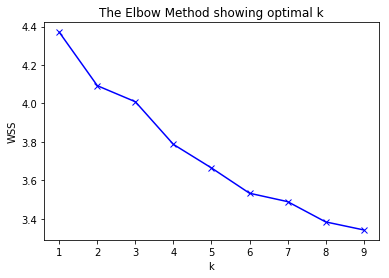

In [31]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=random_state).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing optimal k')
plt.show()

In [32]:
#########update n_clusters#########
# k means prediction
kmeanModel = KMeans(n_clusters=5,random_state=random_state).fit(X)
kmeanModel.fit(X)
y = kmeanModel.predict(X)

In [33]:
#df_cluster = pd.DataFrame(y, index = X.index)
#df_cluster.columns = ['cluster']

df_final = pd.concat([X, pd.DataFrame(y, index = X.index)])
df_final.head()

C:\Users\Tse\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,Subcat_Coupon (General),Subcat_Bite Size,Subcat_HOT TITLES,Subcat_Non-Menthol Lights KS,Subcat_Cakes,Subcat_Non-Menthol Full Flavor KS,Subcat_FBA Bun(General),Subcat_Can,Subcat_Newspaper (General),Subcat_Potato,...,Subcat_Tetra Pack,Subcat_946ML,Subcat_LOYALTYPROG COU(General),Subcat_Bottle,total_products,total_quantity,recency,frequency,monetary_value,0
Member ID,,,,,,,,,,,,,,,,,,,,,
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,6.0,0.0,2.944439,2.944439,2.639057,2.639057,5.357529,NaN
54151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,1.945910,1.945910,2.302585,1.386294,4.757033,NaN
63968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,1.609438,1.609438,2.397895,1.386294,4.840242,NaN
72178,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,3.0,0.0,11.0,6.0,3.178054,3.367296,2.302585,2.197225,5.809043,NaN
81685,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.484907,2.484907,2.639057,1.945910,5.642262,NaN


In [34]:
df_cluster = pd.DataFrame(y, index = X.index)
df_cluster.columns= ['cluster']
df_cluster.head()

,cluster
Member ID,
274,0
54151,0
63968,1
72178,1
81685,0


In [35]:
df_final = pd.merge(X, df_cluster, left_index = True, right_index = True)
df_final.head()

,Subcat_Coupon (General),Subcat_Bite Size,Subcat_HOT TITLES,Subcat_Non-Menthol Lights KS,Subcat_Cakes,Subcat_Non-Menthol Full Flavor KS,Subcat_FBA Bun(General),Subcat_Can,Subcat_Newspaper (General),Subcat_Potato,...,Subcat_Tetra Pack,Subcat_946ML,Subcat_LOYALTYPROG COU(General),Subcat_Bottle,total_products,total_quantity,recency,frequency,monetary_value,cluster
Member ID,,,,,,,,,,,,,,,,,,,,,
274,0,0,0,0,0,0,0,5,0,0,...,0,0,6,0,2.944439,2.944439,2.639057,2.639057,5.357529,0
54151,0,0,0,0,0,0,0,0,0,0,...,0,0,3,2,1.945910,1.945910,2.302585,1.386294,4.757033,0
63968,0,0,0,0,0,0,0,0,0,0,...,0,0,3,3,1.609438,1.609438,2.397895,1.386294,4.840242,1
72178,0,3,0,0,0,0,0,0,1,2,...,3,0,11,6,3.178054,3.367296,2.302585,2.197225,5.809043,1
81685,0,2,0,0,0,0,1,0,0,0,...,0,0,0,2,2.484907,2.484907,2.639057,1.945910,5.642262,0


In [36]:
print('total sum', '\n')
print(df_final.iloc[:].sum(), '\n', '\n')

for i in df_final['cluster'].unique():
    print('custer' + str(i) + 'sum', '\n')
    print(df_final[df_final['cluster'] == i].iloc[:].sum(), '\n', '\n')

total sum 

Subcat_Coupon (General)               237.000000
Subcat_Bite Size                      238.000000
Subcat_HOT TITLES                     265.000000
Subcat_Non-Menthol Lights KS          265.000000
Subcat_Cakes                          266.000000
Subcat_Non-Menthol Full Flavor KS     283.000000
Subcat_FBA Bun(General)               338.000000
Subcat_Can                            353.000000
Subcat_Newspaper (General)            360.000000
Subcat_Potato                         386.000000
Subcat_Menthol Lights KS              462.000000
Subcat_Nestle                         481.000000
Subcat_Menthol Ultra Lights KS        546.000000
Subcat_Misc (General)                 569.000000
Subcat_Appolo                         645.000000
Subcat_236ML                          661.000000
Subcat_Tetra Pack                     745.000000
Subcat_946ML                          834.000000
Subcat_LOYALTYPROG COU(General)      1291.000000
Subcat_Bottle                        1600.000000
total_pr